In [1]:
# code:utf-8 #

In [2]:
import pandas as pd
import jieba
import random
import fasttext
import matplotlib.pyplot as plt

In [3]:
# 1、获取数据
df_all_data = pd.read_excel(io="../src/gastric.xlsx", engine="openpyxl")
#   * 加载停用词
with open('../src/stop_words.txt', 'r', encoding="utf-8") as f:
    stop_words = list(l.strip() for l in f.readlines())
stop_words.extend(['\n', '（', '）', ' '])  # 由于停用词中没有'\n'和中文的左右括号和空格，所以单独再加上去

In [4]:
df_all_data.head()

,Label,Text
0,1,（胃体小弯活检）\n粘膜慢性活动性萎缩性炎伴腺体中度肠化及糜烂，局灶腺体粘液样变及低级别上皮...
1,1,（胃窦小弯）粘膜慢性活动性炎伴少量出血，另见少量炎性渗出，局灶腺体低级别上皮内瘤变。\n幽门...
2,1,慢性轻度萎缩性胃（窦小弯）炎伴腺体轻度肠化及浅表糜烂，局灶腺体低级别上皮内瘤变。\n幽门螺旋...
3,1,1、（胃窦小弯活检）粘膜慢性活动性炎伴浅表糜烂。\n2、（胃体后壁活检）黏膜慢性炎伴局灶呈息...
4,1,1、（胃角活检）粘膜慢性炎伴轻度肠化及少量出血、糜烂，局灶腺体低级别上皮内瘤变。\n2、（胃...


In [5]:
# 2、数据预处理
#   * 将数据处理成fasttext可以处理的格式，如：  __label__1,胃角 小弯 ……
def preprocess_data_to_fasttext(pd_data, sentences, stopwords):
    for _, row in pd_data.iterrows():
        temp = jieba.cut(row[1])
        temp = [k for k in jieba.lcut(row[1], cut_all=False) if k not in stopwords]
        sentences.append('__label__' + str(row[0]) + ', ' + ' '.join(temp))  # 由于Label是整形，所以需要改为字符
        #         sentences.append('__label__'+str(row[0])+' '.join(temp)) # 由于Label是整形，所以需要改为字符
        print(row[1])


result_sentences = []  # 存储分词后的所有种类的文本
preprocess_data_to_fasttext(df_all_data, result_sentences, stop_words)
#   * 随机打乱数据
random.shuffle(result_sentences)
#   * 简单划分训练集、验证集和测试集，并将数据保存至txt文件
with open(file="./fasttext_train.txt", mode='w', encoding="utf8") as fw:
    for sentence in result_sentences[:int(len(result_sentences) * .7)]:
        fw.write(sentence + '\n')
with open(file="./fasttext_valid.txt", mode='w', encoding="utf8") as fw:
    for sentence in result_sentences[int(len(result_sentences) * .7):int(len(result_sentences) * .9)]:
        fw.write(sentence + '\n')
with open(file="./fasttext_test.txt", mode='w', encoding="utf8") as fw:
    for sentence in result_sentences[int(len(result_sentences) * .9):]:
        fw.write(sentence + '\n')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\冷月\AppData\Local\Temp\jieba.cache
Loading model cost 0.759 seconds.
Prefix dict has been built successfully.


（胃体小弯活检）
粘膜慢性活动性萎缩性炎伴腺体中度肠化及糜烂，局灶腺体粘液样变及低级别上皮内瘤变。
（建议随诊、定期复查！）
（胃窦小弯）粘膜慢性活动性炎伴少量出血，另见少量炎性渗出，局灶腺体低级别上皮内瘤变。
幽门螺旋杆菌（HP）：（阴性，-）。
（建议临床随访！）
慢性轻度萎缩性胃（窦小弯）炎伴腺体轻度肠化及浅表糜烂，局灶腺体低级别上皮内瘤变。
幽门螺旋杆菌（HP）：（阴性，-）。
（建议临床随访！）
1、（胃窦小弯活检）粘膜慢性活动性炎伴浅表糜烂。
2、（胃体后壁活检）黏膜慢性炎伴局灶呈息肉样增生。
3、（胃窦体交界处大弯活检）粘膜慢性活动性炎伴浅表糜烂，局灶腺体低级别上皮内瘤变。
4、（胃体下部大弯活检）粘膜慢性活动性炎伴浅表糜烂，局灶腺体低级别上皮内瘤变。。
（建议治疗后复查！）
1、（胃角活检）粘膜慢性炎伴轻度肠化及少量出血、糜烂，局灶腺体低级别上皮内瘤变。
2、（胃窦小弯活检）粘膜慢性炎伴轻度肠化及少量出血、糜烂。
（建议随诊、定期复查！）
慢性活动性萎缩性胃（角小弯）炎伴少量出血及浅表糜烂，局灶腺体低级别上皮内瘤变。
幽门螺旋杆菌（HP）：（阳性，+）
（建议临床随访！）
1、（胃窦小弯活检）慢性活动性萎缩性胃炎伴中度肠化及浅表糜烂，局灶腺体低级别上皮内瘤变。
2、（胃窦体交界大弯活检）慢性活动性萎缩性胃炎伴中度肠化。
3、（胃体小弯活检）黏膜慢性活动性炎伴中度肠化。
（建议肠化分型检查！）
（建议定期复查！）
（胃窦后壁活检）粘膜慢性炎伴浅表糜烂，局灶腺体低级别上皮内瘤变。
（建议定期复查！）
1、（幽门前区活检）黏膜慢性活动性炎伴局灶糜烂，部分腺体低级别上皮内瘤变。
2、（胃角胃体侧活检）黏膜慢性活动性炎伴轻度肠化及局灶糜烂。

（建议治疗后复查）
（胃窦小弯活检）慢性活动性萎缩性胃炎伴轻度肠化及局灶糜烂，部分腺体低级别上皮内瘤变。

幽门螺杆菌（HP）：（阳性，+）。
（胃壁）受检大部分为粘膜慢性活动性炎及坏死组织，其中见少量挤压的异型细胞，未见明显恶性依据。
（建议临床密切随访！）
1、（胃角活检）慢性活动性萎缩性胃炎伴局灶糜烂。
2、（胃窦小弯活检）黏膜慢性活动性炎伴局灶糜烂，个别腺体低级别上皮内瘤变。
3、（贲门下活检）黏膜慢性活动性炎伴局灶糜烂。

（建议治疗后复查！）
（胃窦小弯近胃角活检）慢性活动性萎缩性胃炎伴重度肠化及局灶糜烂，部

In [6]:
# # 3、通过fasttext自动实现超参数优化，获取模型
# ft_model = fasttext.train_supervised(input='./fasttext_train.txt',
#                                      autotuneValidationFile='./fasttext_valid.txt',
#                                      autotuneDuration=60)
# ft_model.save_model("./fasttext_model.bin")

In [7]:
# 4、加载模型
fasttext.FastText.eprint = lambda x: None
ft_model = fasttext.load_model("./fasttext_best_model.bin")

In [8]:
# 5、模型评估以及预测

def my_test(filepath):
    global ft_model,acc,number
    """
    :param filepath: 需要测试的文件
    :return:  label_list: 真实分类  labels_predict: 预处理好的分类
    """
    # 由于是多分类（该题每篇文本，仅仅属于某种分类，可以该文本仅有成唯一标签，所以k=1）
    # 直接求整体的精确率和召回率都相当是求 预测正确的分类个数/总共的个数
    result = ft_model.test(filepath, k=1)
    # 所以准确率=精确率=召回率
    acc = result[1]
    number = result[0]
    print('样本数量:', result[0])
    print('准确率:', acc)
    content_list = []
    label_list = []
    with open(filepath, 'r', encoding="utf-8") as fr:
        for line in fr.readlines():
            content_list.append(line.strip().split(",")[1])
            label_list.append(line.strip().split(",")[0])
    # * 预处理一下预测的标签标签值 使之与从测试集读取出来的label格式一致
    labels_predict = ft_model.predict(content_list)[0]
    labels_predict = [i[:-1] for ii in labels_predict for i in ii]
    return label_list,labels_predict

样本数量: 175
准确率: 0.96
样本数量: 50
准确率: 0.94
样本数量: 25
准确率: 1.0


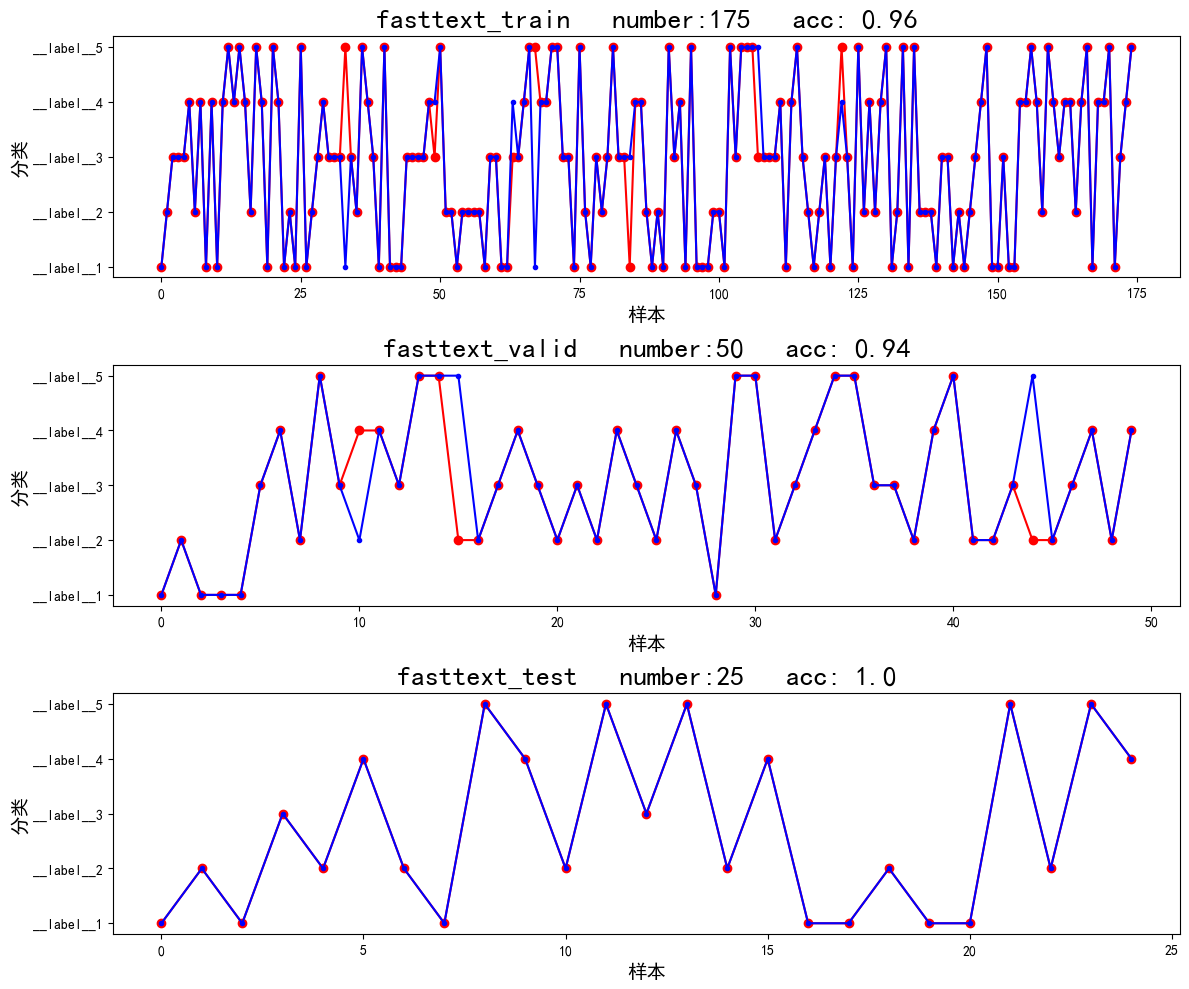

In [9]:
# 5.2、绘图
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 显示中文标签
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 10))
scale_ls = range(5)
index_ls = ['__label__1', '__label__2', '__label__3', '__label__4', '__label__5']


plt.subplot(311)
plt.yticks(scale_ls, index_ls)  ## 可以设置坐标字
filepath = "./fasttext_train.txt"
label_list, labels_predict= my_test(filepath)
plt.plot(label_list, color="red", marker='o', label="真实分类")
plt.plot(labels_predict, color="blue", marker='.', label="预测分类")
plt.xlabel("样本", fontsize=14)
plt.ylabel("分类", fontsize=14)
plt.title(f"{filepath[2:-4]}   number:{number}   acc: {round(acc,2)}", fontsize=20)

plt.subplot(312)
plt.yticks(scale_ls, index_ls)  ## 可以设置坐标字
filepath = "./fasttext_valid.txt"
label_list, labels_predict= my_test(filepath)
plt.plot(label_list, color="red", marker='o', label="真实分类")
plt.plot(labels_predict, color="blue", marker='.', label="预测分类")
plt.xlabel("样本", fontsize=14)
plt.ylabel("分类", fontsize=14)
plt.title(f"{filepath[2:-4]}   number:{number}   acc: {round(acc,2)}", fontsize=20)

plt.subplot(313)
plt.yticks(scale_ls, index_ls)  ## 可以设置坐标字
filepath = "./fasttext_test.txt"
label_list, labels_predict= my_test(filepath)
plt.plot(label_list, color="red", marker='o', label="真实分类")
plt.plot(labels_predict, color="blue", marker='.', label="预测分类")
plt.xlabel("样本", fontsize=14)
plt.ylabel("分类", fontsize=14)
plt.title(f"{filepath[2:-4]}   number:{number}   acc: {round(acc,2)}", fontsize=20)

plt.tight_layout() # 解决标题重叠
plt.show()